In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [5]:
def accessmap(row):
    if ((float(row['ASA']) ==0) & (float(row['BSA'])==0)):
        val = 'B'
    elif ((float(row['ASA']) >0) & (float(row['BSA'])==0)):
        val = 'A'
    elif ((float(row['ASA']) >0) & (float(row['BSA'])>0)):
        val = 'I'
    return val

In [6]:
#################################################################################### Accessibility statistics
Scop3P_structure=pd.read_csv('Structure_analysis_PISA.txt',sep='\t')
Scop3P_structure.shape

(8482, 26)

In [7]:
accdataSTY=pd.read_csv('PISA_ASA_allSTY.txt',sep='\t')
accdataSTY['PDBchain']=accdataSTY['PDBID']+accdataSTY['CHAINID']
accdataSTY=accdataSTY[accdataSTY['RESPOS'].isin(['SER','THR','TYR','SEP','TPO','PTR'])]
accdataSTY.PDBPOS=accdataSTY.PDBPOS.astype(int)


after fragment size site filtering and amino acid filtering 8432
after fragment and length PDB IDs 3517
after fragment and length UP IDs 3059

 RESIDUES and Ssec
SER    4879
THR    2035
TYR    1442
TPO      28
SEP      25
PTR      23
Name: RESIDUE, dtype: int64
C    4622
H    2218
E    1090
-     502
Name: Ssec, dtype: int64


SER    0.578629
THR    0.241343
TYR    0.171015
TPO    0.003321
SEP    0.002965
PTR    0.002728
Name: RESIDUE, dtype: float64
C    0.548150
H    0.263046
E    0.129269
-    0.059535
Name: Ssec, dtype: float64

SER/SEP in Ssec C    0.607463
H    0.244086
E    0.093801
-    0.054649
Name: Ssec, dtype: float64

THR/TPO in Ssec C    0.563742
H    0.235095
E    0.147358
-    0.053805
Name: Ssec, dtype: float64

TYR/PTR in Ssec H    0.365870
C    0.327645
E    0.222526
-    0.083959
Name: Ssec, dtype: float64

After ASA == - filter (6893, 27)
Total number of sites in accessible region 5701
Total number of sites in interface region 1076
Total number of sites in buried 

/home/pathmanaban/.local/lib/python3.8/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/pathmanaban/.local/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/home/pathmanaban/.local/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

Access, interface and buried 11 data points 4873 886 116


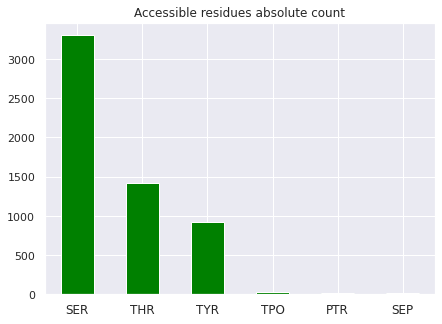

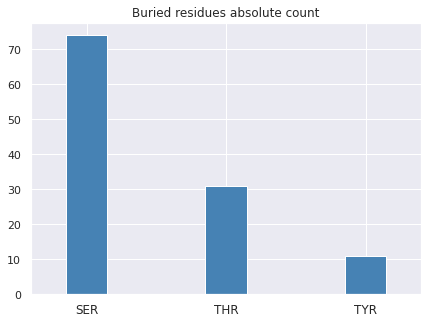

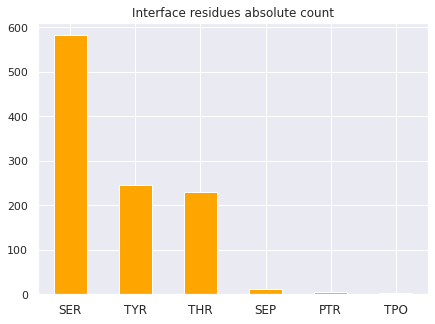

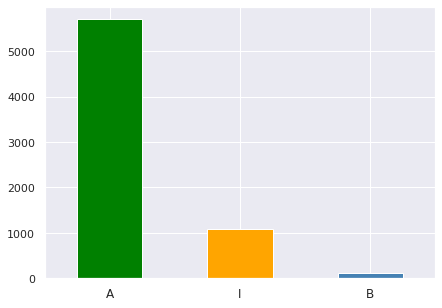

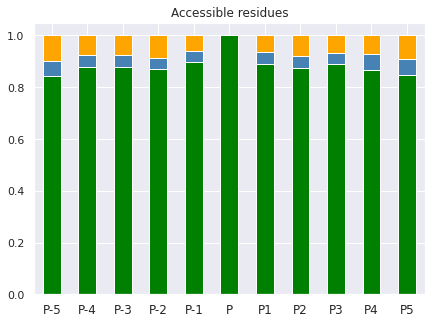

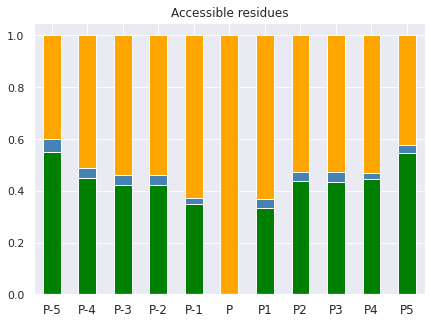

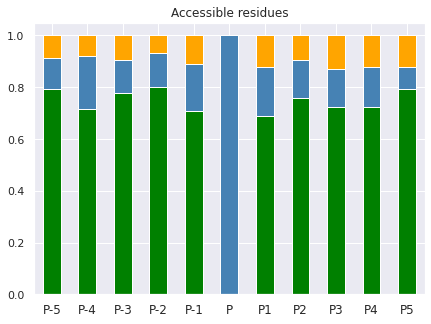

In [8]:
#######################################################################   Accessibility statistics overall
STRtemp=Scop3P_structure
STRtemp=STRtemp[STRtemp['length']>=50]
STRtemp=STRtemp[STRtemp['fragment']>=50]
sns.set(style='darkgrid')

Scop3P_allSTR_filt=STRtemp
Scop3P_allSTR_filt['RESIDUE']= np.where(Scop3P_allSTR_filt['RESIDUE'] == '-', Scop3P_allSTR_filt['UP_RES'],\
                                        Scop3P_allSTR_filt['RESIDUE'])


Scop3P_allSTR_filt['RESIDUE']= np.where(Scop3P_allSTR_filt['RESIDUE'] == 'X', Scop3P_allSTR_filt['PDB_RES'],\
                                        Scop3P_allSTR_filt['RESIDUE'])
Scop3P_allSTR_filt.loc[(Scop3P_allSTR_filt.RESIDUE == 'S'),'RESIDUE']='SER'
Scop3P_allSTR_filt.loc[(Scop3P_allSTR_filt.RESIDUE == 'T'),'RESIDUE']='THR'
Scop3P_allSTR_filt.loc[(Scop3P_allSTR_filt.RESIDUE == 'Y'),'RESIDUE']='TYR'

Scop3P_allSTR_filt=Scop3P_allSTR_filt[Scop3P_allSTR_filt['RESIDUE'].isin(['SER','SEP','THR',\
                                                                                        'TPO','TYR','PTR'])]

print("\nafter fragment size site filtering and amino acid filtering",Scop3P_allSTR_filt.shape[0])
print("after fragment and length PDB IDs",Scop3P_allSTR_filt['PDBID'].nunique())
print("after fragment and length UP IDs",Scop3P_allSTR_filt['ACC_ID'].nunique())

print ("\n RESIDUES and Ssec")
print (Scop3P_allSTR_filt.RESIDUE.value_counts())
print (Scop3P_allSTR_filt.Ssec.value_counts())
print ('\n')
print (Scop3P_allSTR_filt.RESIDUE.value_counts(normalize=True))
print (Scop3P_allSTR_filt.Ssec.value_counts(normalize=True))
print ("\nSER/SEP in Ssec",Scop3P_allSTR_filt[Scop3P_allSTR_filt['RESIDUE'].isin(['SER','SEP'])].Ssec.value_counts(normalize=True))
print ("\nTHR/TPO in Ssec",Scop3P_allSTR_filt[Scop3P_allSTR_filt['RESIDUE'].isin(['THR','TPO'])].Ssec.value_counts(normalize=True))
print ("\nTYR/PTR in Ssec",Scop3P_allSTR_filt[Scop3P_allSTR_filt['RESIDUE'].isin(['TYR','PTR'])].Ssec.value_counts(normalize=True))

Scop3P_allSTR_filt=Scop3P_allSTR_filt[(Scop3P_allSTR_filt['ASA']!='-') & (Scop3P_allSTR_filt['RESIDUE'].isin(['SER','SEP','THR',\
                                                                                        'TPO','TYR','PTR']))]

Scop3P_allSTR_filt['Accessibility']=Scop3P_allSTR_filt.apply(accessmap,axis=1)
print("\nAfter ASA == - filter",Scop3P_allSTR_filt.shape)


access=Scop3P_allSTR_filt[Scop3P_allSTR_filt['Accessibility']=='A']
buried=Scop3P_allSTR_filt[Scop3P_allSTR_filt['Accessibility']=='B']
interface=Scop3P_allSTR_filt[Scop3P_allSTR_filt['Accessibility']=='I']


print ("Total number of sites in accessible region", access.shape[0])
print ("Total number of sites in interface region", interface.shape[0])
print ("Total number of sites in buried region", buried.shape[0])

print ("%%%%%%%%%%%%%%%%%%%%%%%% Accessible %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")

plt.figure(figsize=(7,5))
prob_A = access['RESIDUE'].value_counts(normalize=False)
prob_A.plot(kind='bar',color='green',rot=0)
plt.title('Accessible residues absolute count')
plt.tick_params(axis='x', labelsize=12)
print (access['RESIDUE'].value_counts(normalize=False))

print (access['RESIDUE'].value_counts(normalize=True))


print ("%%%%%%%%%%%%%%%%%%%%%%%  Buried  %%%%%%%%%%%%%%%%%%%%%%%%%%%")


plt.figure(figsize=(7,5))
prob_B = buried['RESIDUE'].value_counts(normalize=False)
prob_B.plot(kind='bar',color='steelblue',width=0.3,rot=0)
plt.title('Buried residues absolute count')
plt.tick_params(axis='x', labelsize=12)
print (buried['RESIDUE'].value_counts(normalize=False))

print (buried['RESIDUE'].value_counts(normalize=True))
print ("%%%%%%%%%%%%%%%%%%%%%%%%  Interface  %%%%%%%%%%%%%%%%%%%%%%%%%%%")


plt.figure(figsize=(7,5))
prob_I = interface['RESIDUE'].value_counts(normalize=False)
prob_I.plot(kind='bar',color='orange',rot=0)
plt.title('Interface residues absolute count')
plt.tick_params(axis='x', labelsize=12)
print (interface['RESIDUE'].value_counts(normalize=False))

print (interface['RESIDUE'].value_counts(normalize=True))
print ("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")

plt.figure(figsize=(7,5))

Scop3P_allSTR_filt['Accessibility'].value_counts().plot.bar(color=['green','orange','steelblue'],rot=0)
plt.tick_params(axis='x', labelsize=12)


#######################################################################################################

accessdata=access[['ACC_ID', 'PDBID', 'CHAINID','UP_POS','PDBPOS_y','RESIDUE','ASA', 'BSA','Ssec']]
accessdata.columns=['ACC_ID', 'PDBID', 'CHAINID','UP_POS','PDBPOS','RESIDUE','ASA', 'BSA','Ssec']
accessdata.PDBPOS=accessdata.PDBPOS.astype(int)
accessdata=accessdata.merge(accdataSTY,on=['ACC_ID', 'PDBID', 'CHAINID','PDBPOS'])

interfacedata=interface[['ACC_ID', 'PDBID', 'CHAINID','UP_POS','PDBPOS_y','RESIDUE','ASA', 'BSA','Ssec']]
interfacedata.columns=['ACC_ID', 'PDBID', 'CHAINID','UP_POS','PDBPOS','RESIDUE','ASA', 'BSA','Ssec']
interfacedata.PDBPOS=interfacedata.PDBPOS.astype(int)
interfacedata=interfacedata.merge(accdataSTY,on=['ACC_ID', 'PDBID', 'CHAINID','PDBPOS'])

burieddata=buried[['ACC_ID', 'PDBID', 'CHAINID','UP_POS','PDBPOS_y','RESIDUE','ASA', 'BSA','Ssec']]
burieddata.columns=['ACC_ID', 'PDBID', 'CHAINID','UP_POS','PDBPOS','RESIDUE','ASA', 'BSA','Ssec']
burieddata.PDBPOS=burieddata.PDBPOS.astype(int)
burieddata=burieddata.merge(accdataSTY,on=['ACC_ID', 'PDBID', 'CHAINID','PDBPOS'])

###########################################################################################################
plt.rcParams['axes.labelsize'] = 16
accessdata11_P=accessdata[accessdata['Accesibility'].str.count(',').add(1)==11]
accessP=accessdata11_P[['Accesibility']]
accessP[['P-5','P-4','P-3','P-2','P-1','P','P1','P2','P3','P4','P5']]=accessP.Accesibility.str.split(",",expand=True) 
accessP=accessP.drop(['Accesibility'],axis=1)
accessP=accessP.apply(pd.value_counts, axis=0,normalize=True)
accessP.T.plot(kind='bar',rot=0,stacked=True,legend=False,color=['green','steelblue','orange'],title='Accessible residues',figsize=(7,5)) 
plt.tick_params(axis='x', labelsize=12)

interfacedata11_P=interfacedata[interfacedata['Accesibility'].str.count(',').add(1)==11]
interfaceP=interfacedata11_P[['Accesibility']]
interfaceP[['P-5','P-4','P-3','P-2','P-1','P','P1','P2','P3','P4','P5']]=interfaceP.Accesibility.str.split(",",expand=True) 
interfaceP=interfaceP.drop(['Accesibility'],axis=1)
interfaceP=interfaceP.apply(pd.value_counts, axis=0,normalize=True)
interfaceP.T.plot(kind='bar',rot=0,stacked=True,legend=False,color=['green','steelblue','orange'],title='Accessible residues',figsize=(7,5)) 
plt.tick_params(axis='x', labelsize=12)

burieddata11_P=burieddata[burieddata['Accesibility'].str.count(',').add(1)==11]
buriedP=burieddata11_P[['Accesibility']]
buriedP[['P-5','P-4','P-3','P-2','P-1','P','P1','P2','P3','P4','P5']]=buriedP.Accesibility.str.split(",",expand=True) 
buriedP=buriedP.drop(['Accesibility'],axis=1)
buriedP=buriedP.apply(pd.value_counts, axis=0,normalize=True)
buriedP.T.plot(kind='bar',stacked=True,rot=0,legend=False,color=['green','steelblue','orange'],title='Accessible residues',figsize=(7,5)) 
plt.tick_params(axis='x', labelsize=12)


print ("Access, interface and buried 11 data points",accessdata11_P.shape[0],interfacedata11_P.shape[0],\
      burieddata11_P.shape[0])

C    0.564921
H    0.293196
E    0.140722
-    0.001161
Name: Ssec, dtype: float64


<AxesSubplot:title={'center':'Buried'}, ylabel='Ssec'>

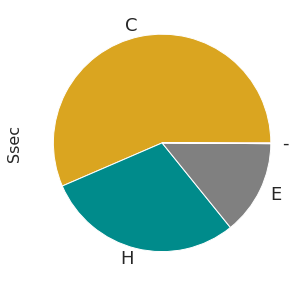

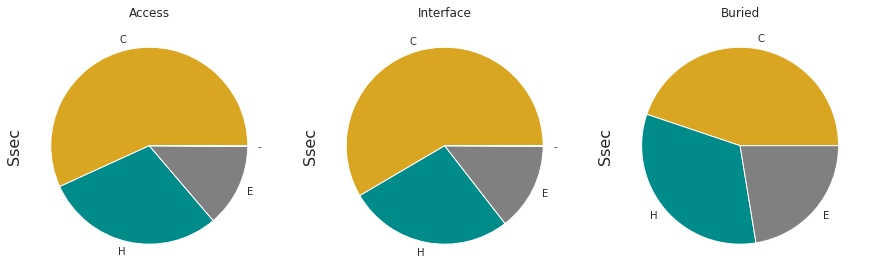

In [9]:
######################################################## Secondary structure overall and A/B/I 
plt.figure(figsize=(7,5))
print (Scop3P_allSTR_filt.Ssec.value_counts(normalize=True))
labels=['C','H','E','-']
Scop3P_allSTR_filt.Ssec.value_counts(normalize=True).plot(kind='pie', fontsize=18,colors=['goldenrod','darkcyan','grey','red'])


fig, ax = plt.subplots(1, 3,figsize=(15,10))
access.Ssec.value_counts(normalize=True).plot(kind='pie', fontsize=10,ax=ax[0],\
                                              labels=labels,colors=['goldenrod','darkcyan','grey'],title='Access')

interface.Ssec.value_counts(normalize=True).plot(kind='pie', fontsize=10,ax=ax[1],\
                                                labels=labels,colors=['goldenrod','darkcyan','grey'],title='Interface')


buried.Ssec.value_counts(normalize=True).plot(kind='pie', fontsize=10,ax=ax[2],\
                                             labels=labels,colors=['goldenrod','darkcyan','grey'],title='Buried')
